In [2]:
import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re











In [3]:
def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+.(?:' + ext + '))', f.lower())]
#Number of recognition class
classNumber = 2

In [4]:
#Import training data

X = []
Y = []
I = []
dataNum = []

for i in range(classNumber):
    filepath = './spectrogram/class' + str(i+1) + '/'
    dataNum.append(0)
    for picture in list_pictures(filepath):
        origimg = load_img(picture, target_size=(40,100))
        I.append(origimg)
        img = img_to_array(origimg)
        X.append(img)
        Y.append(i)
        dataNum[i] += 1


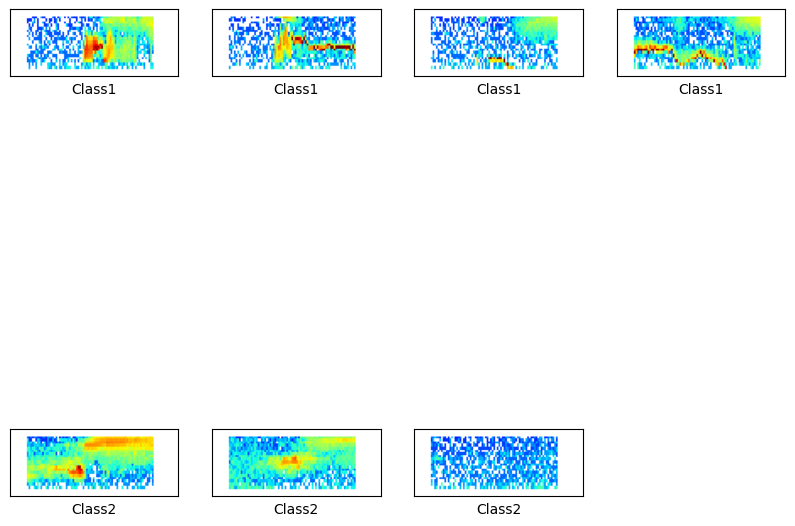

In [7]:
# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

# for i in range(classNumber):
    # print(dataNum[I])
#Display training data

class_names = []
for i in range(classNumber):
    class_names.append('Class' + str(i+1))

plt.figure(figsize=(10,10))
pltNum = 0
for i in range(classNumber):
    for j in range(dataNum[i]):
        plt.subplot(classNumber,max(dataNum),i*max(dataNum)+j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(I[pltNum])
        plt.xlabel(class_names[Y[pltNum]])
        pltNum += 1

plt.show()


In [8]:
# Transform pixel value from 0 to 1

X = X.astype('float32')
X = X / 255.0

# Categorical class
# Y = utils.to_categorical(Y, classNumber)  # この行を削除

# Network setup

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


/Users/masunohayato/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Remove comments when low accuracy
'''
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))       # Number of classを1に変更
model.add(Activation('sigmoid'))  # sigmoid活性化関数を使用


In [10]:
# Compile
model.compile(loss='binary_crossentropy',  # 損失関数をbinary_crossentropyに変更
              optimizer='SGD',
              metrics=['accuracy'])


In [11]:
# Network Configuration

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 40, 100, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 100, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 38, 98, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 38, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29792)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,254,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,264,673 (58.23 MB)

 Trainable params: 15,264,673 (58.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Learning

history = model.fit(X, Y, batch_size=3, epochs=50)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4226 - loss: 0.9484 
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4226 - loss: 1.4561
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5774 - loss: 0.7042
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5357 - loss: 0.7576
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4940 - loss: 0.6104
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8036 - loss: 0.5706
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8155 - loss: 0.5618
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.4652
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8036 - loss: 0.4682
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8036 - loss: 0.3772
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8036 - loss: 0.5510
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.3894


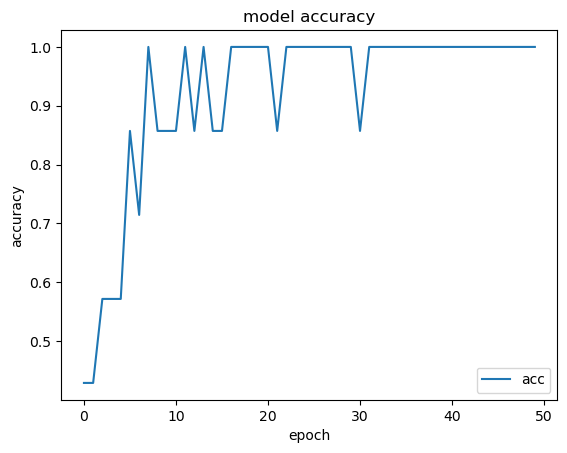

In [13]:
# Learning process 

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()
